# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | isafjordur
Processing Record 3 of Set 1 | zaruma
Processing Record 4 of Set 1 | florence
Processing Record 5 of Set 1 | dawei
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | berdigestyakh
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | qaqortoq
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | barra de santo antonio
Processing Record 15 of Set 1 | tubarjal
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | yarkovo
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | metlili chaamba
Processing Record 21 of Set 1 | alice springs
Processing Record 22 of Set 1 

Processing Record 37 of Set 4 | afaahiti
Processing Record 38 of Set 4 | pihuamo
Processing Record 39 of Set 4 | inhambane
Processing Record 40 of Set 4 | tsiroanomandidy
Processing Record 41 of Set 4 | villamontes
Processing Record 42 of Set 4 | toga village
City not found. Skipping...
Processing Record 43 of Set 4 | kavieng
Processing Record 44 of Set 4 | uray
Processing Record 45 of Set 4 | cockburn town
Processing Record 46 of Set 4 | enewetak
Processing Record 47 of Set 4 | tell city
Processing Record 48 of Set 4 | udomlya
Processing Record 49 of Set 4 | arno
Processing Record 0 of Set 5 | longyearbyen
Processing Record 1 of Set 5 | al 'amarah
Processing Record 2 of Set 5 | cullinan
Processing Record 3 of Set 5 | kapenguria
Processing Record 4 of Set 5 | port elizabeth
Processing Record 5 of Set 5 | nabire
Processing Record 6 of Set 5 | tabuk
Processing Record 7 of Set 5 | kenai
Processing Record 8 of Set 5 | holualoa
Processing Record 9 of Set 5 | ranot
Processing Record 10 of Se

Processing Record 31 of Set 8 | sonsorol village
City not found. Skipping...
Processing Record 32 of Set 8 | badiyah
Processing Record 33 of Set 8 | gornopravdinsk
Processing Record 34 of Set 8 | minas de marcona
Processing Record 35 of Set 8 | altar
Processing Record 36 of Set 8 | bang len
Processing Record 37 of Set 8 | fort bragg
Processing Record 38 of Set 8 | saint-pierre-d'oleron
City not found. Skipping...
Processing Record 39 of Set 8 | phetchabun
Processing Record 40 of Set 8 | hassi messaoud
Processing Record 41 of Set 8 | mucumpiz
Processing Record 42 of Set 8 | nizhneangarsk
Processing Record 43 of Set 8 | santa marta
Processing Record 44 of Set 8 | lijiang
Processing Record 45 of Set 8 | gongdanglegi kulon
Processing Record 46 of Set 8 | hasaki
Processing Record 47 of Set 8 | petropavlovsk-kamchatsky
Processing Record 48 of Set 8 | melfort
Processing Record 49 of Set 8 | fada
Processing Record 0 of Set 9 | ingeniero guillermo n. juarez
Processing Record 1 of Set 9 | curup


Processing Record 17 of Set 12 | puerto santander
Processing Record 18 of Set 12 | haymana
Processing Record 19 of Set 12 | thanh hoa
Processing Record 20 of Set 12 | potosi
Processing Record 21 of Set 12 | raduzhnyy
Processing Record 22 of Set 12 | hampton bays
Processing Record 23 of Set 12 | maintirano
Processing Record 24 of Set 12 | sinop
Processing Record 25 of Set 12 | guerrero negro
Processing Record 26 of Set 12 | bam
Processing Record 27 of Set 12 | aitape
Processing Record 28 of Set 12 | grand falls-windsor
Processing Record 29 of Set 12 | utuado
Processing Record 30 of Set 12 | edson
Processing Record 31 of Set 12 | st. john's
Processing Record 32 of Set 12 | port augusta
Processing Record 33 of Set 12 | kargil
Processing Record 34 of Set 12 | aqadyr
Processing Record 35 of Set 12 | lorengau
Processing Record 36 of Set 12 | keflavik
Processing Record 37 of Set 12 | inari
Processing Record 38 of Set 12 | muzayri'
City not found. Skipping...
Processing Record 39 of Set 12 | t

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,293.39,71,69,10.11,PN,1692014181
1,isafjordur,66.0755,-23.1240,285.17,58,0,0.00,IS,1692014181
2,zaruma,-3.6833,-79.6167,290.23,83,49,1.71,EC,1692014181
3,florence,43.7667,11.2500,311.68,33,0,2.57,IT,1692014176
4,dawei,14.0833,98.2000,298.91,90,44,1.32,MM,1692014181


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,293.39,71,69,10.11,PN,1692014181
1,isafjordur,66.0755,-23.1240,285.17,58,0,0.00,IS,1692014181
2,zaruma,-3.6833,-79.6167,290.23,83,49,1.71,EC,1692014181
3,florence,43.7667,11.2500,311.68,33,0,2.57,IT,1692014176
4,dawei,14.0833,98.2000,298.91,90,44,1.32,MM,1692014181


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

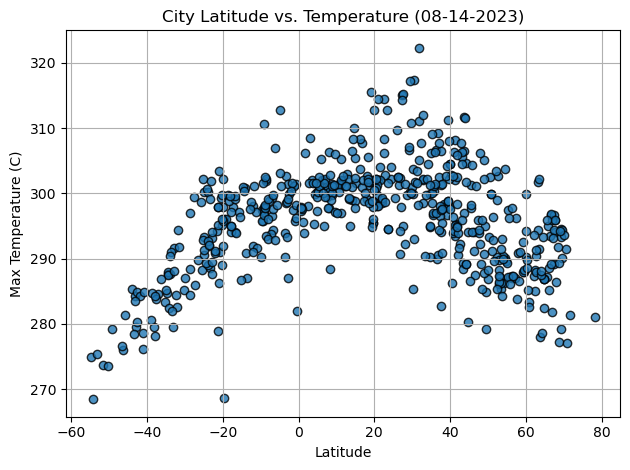

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

#Format date
date = datetime. now()
date = date.strftime("%m-%d-%Y")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

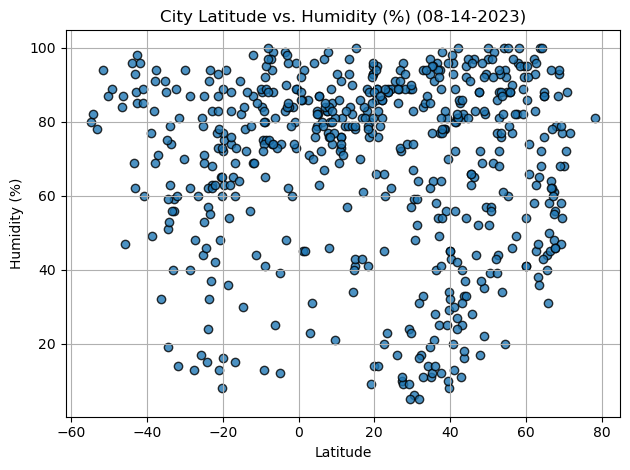

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

#### Latitude vs. Wind Speed Plot

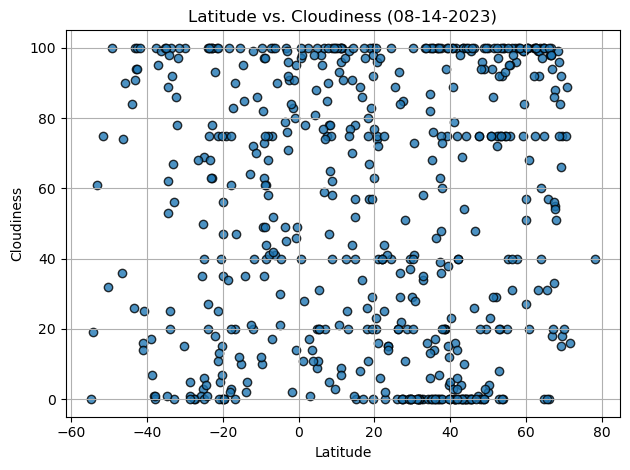

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,isafjordur,66.0755,-23.1240,285.17,58,0,0.00,IS,1692014181
3,florence,43.7667,11.2500,311.68,33,0,2.57,IT,1692014176
4,dawei,14.0833,98.2000,298.91,90,44,1.32,MM,1692014181
6,berdigestyakh,62.0989,126.6992,287.29,97,100,3.13,RU,1692014181
7,bethel,41.3712,-73.4140,293.51,89,0,0.00,US,1692014182


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,293.39,71,69,10.11,PN,1692014181
2,zaruma,-3.6833,-79.6167,290.23,83,49,1.71,EC,1692014181
5,ushuaia,-54.8000,-68.3000,274.96,80,0,1.03,AR,1692014181
9,grytviken,-54.2811,-36.5092,268.46,82,19,4.46,GS,1692014182
10,waitangi,-43.9535,-176.5597,285.27,96,84,6.99,NZ,1692014182


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.5555613211965881


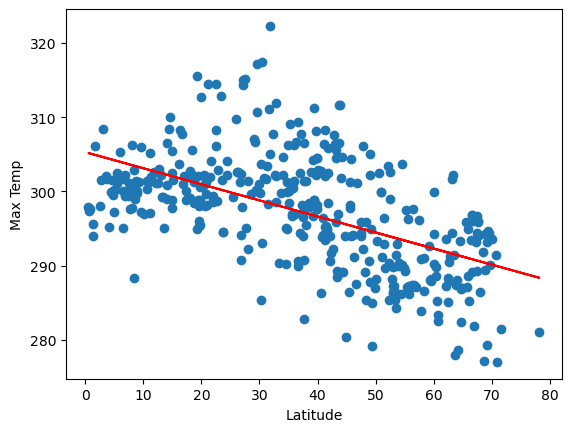

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

The r-value is 0.7540462364629182


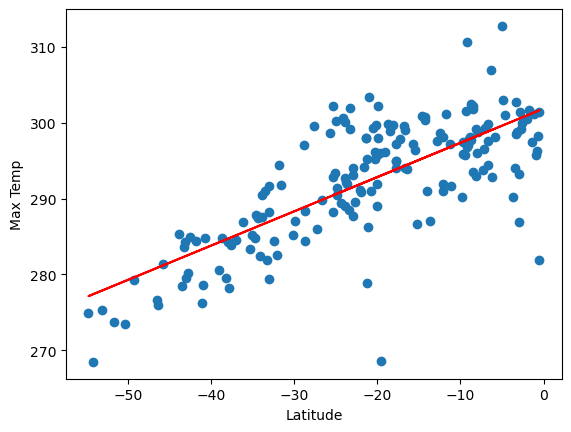

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** the closer the latitude and longitude get to zero, the higher the temperature. this expresses itself as a negative correlation in the northern hemisphere and as positive in the southern hemisphere.As the lattitude gets farther away from zero, the max temp decreases. there is a strong correlation between these values

### Humidity vs. Latitude Linear Regression Plot

The r-value is -0.06233175789924632


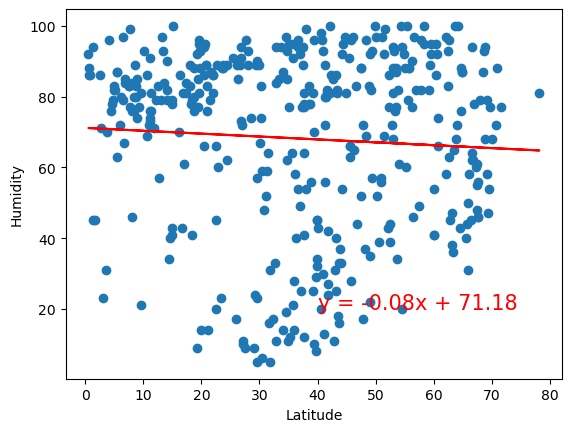

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

The r-value is 0.051015151603525856


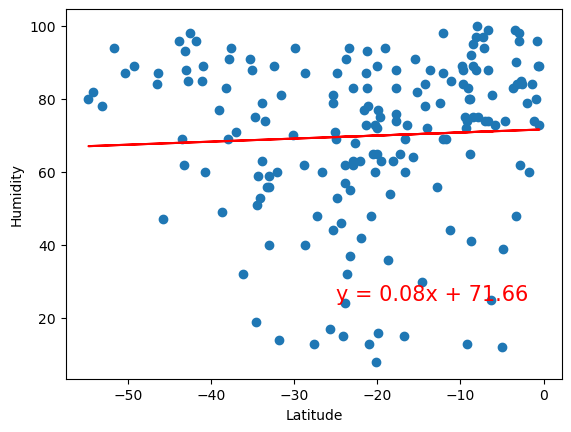

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** with a very low r value, there is not a strong linear correlation between humidity and latidute. we cannot predict what the humidity will be based on an area's latitide. this is true for both the northern and southern hemispheres

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.08074305759335502


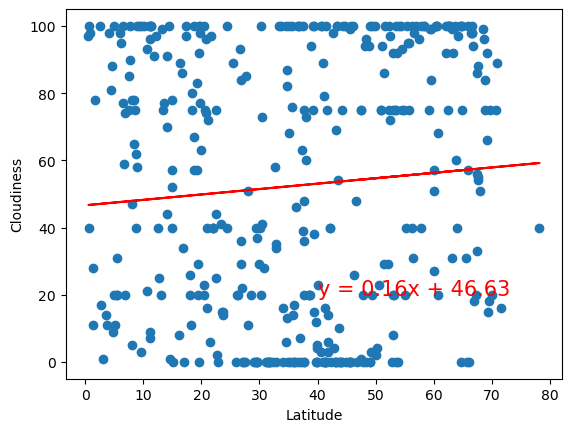

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

The r-value is 0.06441176496537676


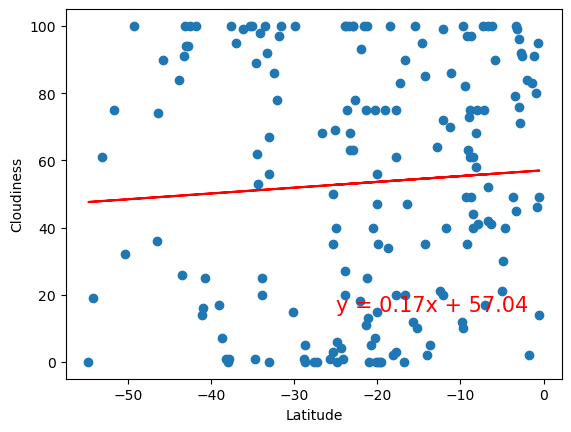

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** there is a slight negative correlation between cloudiness and latitude in both the northern and southern hemispheres. this is interesting because you would expect data from the northern and southern hemispheres to be inverse of each other. as the latitiude increases, in both hemispheres, there is a slight chance that the weather will be less cloudy. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.12318083177682133


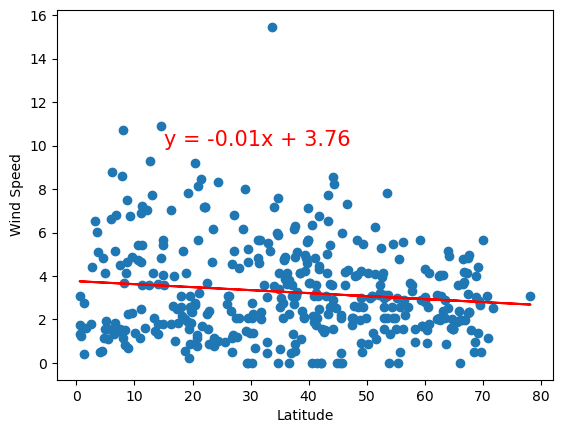

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

The r-value is -0.07138279492866315


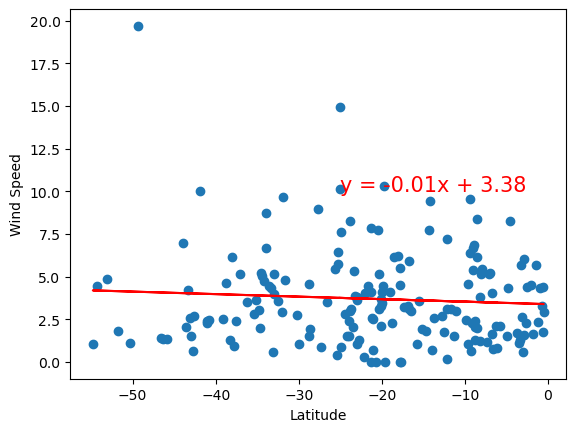

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** there is very little correlation between wind speed and latitude in both the northern and southern hemisphere, with r values of -.12 and -.06 respectively. it is difficult to predict wind speed based on latitude, though there is a stronger correlation in the northern hemisphere. 